### 자료분석: 2004~2022 표준지 공시지가.csv

##### 코랩마운트/한글폰트설치/모듈불러오기
<b>!!이 부분만 단독 실행 후 런타임 초기화 하고 전체 실행할것</b>

In [1]:
#코랩 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#한글폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
#np, pd 로드
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

#plt, seaborn 로드
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트적용
plt.rc('font', family='NanumBarunGothic') 

#기타함수로드
import os
from datetime import datetime, timedelta

#### 1. 파일불러오기

In [4]:
#csv 불러오기
#경로부분 직접 수정

keys = ['1996', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
filename={}
df=pd.DataFrame()
for key in keys:
  filename = '/content/drive/MyDrive/저장용/ground/'+key+'년 표준지 공시지가(대구광역시).csv'
  data = pd.read_csv(filename, index_col = False, encoding='utf-8')
  data['연도']=key
  df = pd.concat([df,data])
df

,Unnamed: 0,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,...,Unnamed: 17,시군구.1,읍면,동리,지번구분.1,본번지.1,부번지.1,지리적위치,용도지역,지세
0,51647,1.0,27110,10100.0,1.0,0009,7,대구광역시,중구,동인동1가 9-7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51648,2.0,27110,10100.0,1.0,0010,6,대구광역시,중구,동인동1가 10-6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51649,3.0,27110,10100.0,1.0,0011,1,대구광역시,중구,동인동1가 11-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51650,4.0,27110,10100.0,1.0,0014,1,대구광역시,중구,동인동1가 14-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51651,5.0,27110,10100.0,1.0,0049,1,대구광역시,중구,동인동1가 49-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,63115,2824.0,27710,38035.0,1.0,0523,11,대구광역시,달성군,구지면 도동리 523-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13713,63116,2825.0,27710,38035.0,1.0,0524,1,대구광역시,달성군,구지면 도동리 524-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13714,63117,2826.0,27710,38035.0,1.0,0550,0,대구광역시,달성군,구지면 도동리 550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13715,63118,2827.0,27710,38035.0,1.0,0563,1,대구광역시,달성군,구지면 도동리 563-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. 데이터 개요

In [5]:
pd.set_option("display.max_columns", 40)

In [6]:
df[df['연도']=='1996']

,Unnamed: 0,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,연도,？일련번호,일단지,공시지가(단위:원),도로접면,형상,고저,Unnamed: 17,시군구.1,읍면,동리,지번구분.1,본번지.1,부번지.1,지리적위치,용도지역,지세
0,51647,1.0,27110,10100.0,1.0,0009,7,대구광역시,중구,동인동1가 9-7,대지,168.3,중심상업지역,NaN,상업용,후면상가지대,평지,세장형,세로(가),800000.0,시청,북측인근,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51648,2.0,27110,10100.0,1.0,0010,6,대구광역시,중구,동인동1가 10-6,대지,85.6,중심상업지역,NaN,단독주택,일반주택지대,평지,세장형,세각(불),640000.0,시청,북측인근,동향,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51649,3.0,27110,10100.0,1.0,0011,1,대구광역시,중구,동인동1가 11-1,대지,306.4,중심상업지역,NaN,상업용,후면상가지대,평지,부정형,세로(불),700000.0,시청,북측인근,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51650,4.0,27110,10100.0,1.0,0014,1,대구광역시,중구,동인동1가 14-1,대지,161.0,중심상업지역,NaN,상업용,노선상가지대,평지,가장형,광대세각,2550000.0,시청,북측인근,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51651,5.0,27110,10100.0,1.0,0049,1,대구광역시,중구,동인동1가 49-1,대지,16.8,중심상업지역,NaN,상업용,노선상가지대,평지,부정형,광대세각,2750000.0,한전,북측인근,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14123,65770,2092.0,27710,38035.0,1.0,507,0,대구광역시,달성군,구지면 도동리 507,대지,293.0,준농림지역,NaN,단독주택,농촌취락지대,평지,부정형,세각(가),30000.0,절골마을내,NaN,동향,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14124,65771,2093.0,27710,38035.0,1.0,519,0,대구광역시,달성군,구지면 도동리 519,전,1448.0,준농림지역,NaN,전,마을주변농경지대,완경사지,부정형,세로(불),11000.0,밤마마을,북측인근,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14125,65772,2094.0,27710,38035.0,1.0,541,0,대구광역시,달성군,구지면 도동리 541,전,5567.0,준농림지역,NaN,전,마을주변농경지대,평지,가장형,맹지,12000.0,전골마을 남서측,인근,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14126,65773,2095.0,27710,38035.0,2.0,3,0,대구광역시,달성군,구지면 도동리 산3,임야,19721.0,준농림지역,NaN,자연림,마을주변야산지대,완경사지,부정형,맹지,600.0,도동마을,서측인근,북향,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df[df['연도']=='2022']

,Unnamed: 0,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,연도,？일련번호,일단지,공시지가(단위:원),도로접면,형상,고저,Unnamed: 17,시군구.1,읍면,동리,지번구분.1,본번지.1,부번지.1,지리적위치,용도지역,지세
0,49403,1.0,27110,10100.0,1.0,0009,7,대구광역시,중구,동인동1가 9-7,대,168.3,중심상업지역,NaN,상업용,후면 상가지대,평지,세로장방형,세로(가),1710000.0,대구시청,북측인근,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49404,2.0,27110,10100.0,1.0,0010,6,대구광역시,중구,동인동1가 10-6,대,85.6,중심상업지역,NaN,단독주택,일반 주택지대,평지,세로장방형,세각(불),1340000.0,대구시청,북측인근,동향,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49405,3.0,27110,10100.0,1.0,0014,1,대구광역시,중구,동인동1가 14-1,대,161.0,중심상업지역,NaN,상업용,노선 상가지대,평지,가로장방형,광대세각,3190000.0,대구시청,북측인근,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49406,4.0,27110,10100.0,1.0,0018,0,대구광역시,중구,동인동1가 18,대,132.2,중심상업지역,NaN,주거나지,일반 주택지대,평지,세로장방형,세로(불),1310000.0,대구시청,북서측인근,동향,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49407,5.0,27110,10100.0,1.0,0049,3,대구광역시,중구,동인동1가 49-3,대,199.4,중심상업지역,NaN,상업용,노선 상가지대,평지,사다리형,광대세각,3180000.0,대구시청,북측인근,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,63115,2824.0,27710,38035.0,1.0,0523,11,대구광역시,달성군,구지면 도동리 523-11,대,200.0,자연녹지지역,NaN,단독주택,농촌 취락지대,평지,사다리형,세각(가),262000.0,절골마을,내,남서향,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13713,63116,2825.0,27710,38035.0,1.0,0524,1,대구광역시,달성군,구지면 도동리 524-1,답,840.0,자연녹지지역,NaN,답,마을주변 농경지대,평지,사다리형,세로(가),244000.0,절골마을,내,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13714,63117,2826.0,27710,38035.0,1.0,0550,0,대구광역시,달성군,구지면 도동리 550,전,883.0,자연녹지지역,NaN,전,마을주변 농경지대,완경사지,부정형,맹지,88000.0,절골마을,남측인근,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13715,63118,2827.0,27710,38035.0,1.0,0563,1,대구광역시,달성군,구지면 도동리 563-1,답,321.0,자연녹지지역,NaN,전,마을주변 농경지대,평지,사다리형,중로각지,198500.0,절골마을,남측인근,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dtypes

Unnamed: 0       int64
일련번호           float64
시군구             object
읍면동리           float64
지번구분           float64
본번지             object
부번지             object
시도명             object
시군구명            object
소재지             object
지목              object
면적             float64
용도지역1           object
용도지역2           object
이용상황            object
주위환경            object
지세명             object
형상명             object
도로교통            object
공시지가           float64
지리적위치1          object
지리적위치2          object
방위              object
연도              object
？일련번호          float64
일단지             object
공시지가(단위:원)     float64
도로접면            object
형상              object
고저              object
Unnamed: 17    float64
시군구.1           object
읍면              object
동리              object
지번구분.1          object
본번지.1           object
부번지.1           object
지리적위치           object
용도지역            object
지세              object
dtype: object

In [9]:
df['이용상황'].unique()

array(['상업용', '단독주택', '업무용', '주상용', '상업업무나지', '주상기타', '상업기타', '주거기타',
       '주거나지', '다세대', '주상나지', '공원등', '연립주택', '아파트', '특수기타', '전기타', '답',
       '전', '유원지', '자연림', '과수원', '공업용', '공업나지', '공업기타', '임야기타', '골프장',
       '토지임야', '답기타', '기타', '목장용지', '주차장', '상업업무용기타', '주차장등', '상업나지',
       '운동장등', '도로등', '터미널', '단독', '연립', '하천등', '공항', '위험시설', '골프장_회원제',
       '골프장_대중제', '휴게소', '광천지', '답창고', '답축사', '야영', '승마장', '조림', '전창고',
       '전축사'], dtype=object)

In [10]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(df['소재지'].unique())

[' 동인동1가 9-7' ' 동인동1가 10-6' ' 동인동1가 11-1' ' 동인동1가 14-1' ' 동인동1가 49-1' ' 동인동1가 62-2' ' 동인동1가 86' ' 동인동1가 90-2' ' 동인동1가 91' ' 동인동1가 192-1' ' 동인동1가 195-12' ' 동인동1가 198-3' ' 동인동1가 200-1' ' 동인동1가 204-2' ' 동인동1가 212-1' ' 동인동1가 224' ' 동인동1가 226-3' ' 동인동1가 226-6' ' 동인동1가 226-15' ' 동인동1가 229' ' 동인동1가 232-7' ' 동인동1가 235-13' ' 동인동1가 250-37' ' 동인동1가 250-45' ' 동인동1가 257-2' ' 동인동1가 264-1' ' 동인동1가 269-3' ' 동인동1가 275-1' ' 동인동1가 282' ' 동인동1가 286-1' ' 동인동1가 294-4' ' 동인동1가 298-8' ' 동인동1가 303-1' ' 동인동1가 308-7' ' 동인동1가 318-1' ' 동인동1가 336-2' ' 동인동1가 343-2' ' 동인동1가 345-3' ' 동인동1가 346-3' ' 동인동1가 350-4' ' 동인동1가 358-1' ' 동인동1가 365' ' 동인동1가 367-3' ' 동인동1가 369-6' ' 동인동1가 379-1' ' 동인동1가 382-5' ' 동인동2가 12-4' ' 동인동2가 20' ' 동인동2가 50-1' ' 동인동2가 52-4' ' 동인동2가 52-25' ' 동인동2가 52-37' ' 동인동2가 56-6' ' 동인동2가 56-9' ' 동인동2가 57-1' ' 동인동2가 61-4' ' 동인동2가 61-13' ' 동인동2가 61-21' ' 동인동2가 65-2' ' 동인동2가 102-4' ' 동인동2가 108-7' ' 동인동2가 108-10' ' 동인동2가 116' ' 동인동2가 136-1' ' 동인동2가 153-1' ' 동인동2가 203' ' 동인동2가 223' ' 동인동2가 227-7' ' 동인동2가 239'

In [45]:
def Sgg(row):
  if row[0] == ' ':
    row = row[1:]
  r = row.split(' ')
  return r[0]

df['시군구']=df['시도명']+' '+df['시군구명']+' '+df['소재지'].astype(str).apply(Sgg)

In [12]:
df

,Unnamed: 0,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,연도,？일련번호,일단지,공시지가(단위:원),도로접면,형상,고저,Unnamed: 17,시군구.1,읍면,동리,지번구분.1,본번지.1,부번지.1,지리적위치,용도지역,지세
0,51647,1.0,대구광역시 중구 동인동1가,10100.0,1.0,0009,7,대구광역시,중구,동인동1가 9-7,대지,168.3,중심상업지역,NaN,상업용,후면상가지대,평지,세장형,세로(가),800000.0,시청,북측인근,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51648,2.0,대구광역시 중구 동인동1가,10100.0,1.0,0010,6,대구광역시,중구,동인동1가 10-6,대지,85.6,중심상업지역,NaN,단독주택,일반주택지대,평지,세장형,세각(불),640000.0,시청,북측인근,동향,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51649,3.0,대구광역시 중구 동인동1가,10100.0,1.0,0011,1,대구광역시,중구,동인동1가 11-1,대지,306.4,중심상업지역,NaN,상업용,후면상가지대,평지,부정형,세로(불),700000.0,시청,북측인근,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51650,4.0,대구광역시 중구 동인동1가,10100.0,1.0,0014,1,대구광역시,중구,동인동1가 14-1,대지,161.0,중심상업지역,NaN,상업용,노선상가지대,평지,가장형,광대세각,2550000.0,시청,북측인근,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51651,5.0,대구광역시 중구 동인동1가,10100.0,1.0,0049,1,대구광역시,중구,동인동1가 49-1,대지,16.8,중심상업지역,NaN,상업용,노선상가지대,평지,부정형,광대세각,2750000.0,한전,북측인근,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,63115,2824.0,대구광역시 달성군 구지면,38035.0,1.0,0523,11,대구광역시,달성군,구지면 도동리 523-11,대,200.0,자연녹지지역,NaN,단독주택,농촌 취락지대,평지,사다리형,세각(가),262000.0,절골마을,내,남서향,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13713,63116,2825.0,대구광역시 달성군 구지면,38035.0,1.0,0524,1,대구광역시,달성군,구지면 도동리 524-1,답,840.0,자연녹지지역,NaN,답,마을주변 농경지대,평지,사다리형,세로(가),244000.0,절골마을,내,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13714,63117,2826.0,대구광역시 달성군 구지면,38035.0,1.0,0550,0,대구광역시,달성군,구지면 도동리 550,전,883.0,자연녹지지역,NaN,전,마을주변 농경지대,완경사지,부정형,맹지,88000.0,절골마을,남측인근,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13715,63118,2827.0,대구광역시 달성군 구지면,38035.0,1.0,0563,1,대구광역시,달성군,구지면 도동리 563-1,답,321.0,자연녹지지역,NaN,전,마을주변 농경지대,평지,사다리형,중로각지,198500.0,절골마을,남측인근,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
print(df['시군구'].unique())

['대구광역시 중구 동인동1가' '대구광역시 중구 동인동2가' '대구광역시 중구 동인동3가' '대구광역시 중구 동인동4가' '대구광역시 중구 삼덕동1가' '대구광역시 중구 삼덕동2가' '대구광역시 중구 삼덕동3가' '대구광역시 중구 봉산동' '대구광역시 중구 장관동' '대구광역시 중구 상서동' '대구광역시 중구 수동' '대구광역시 중구 덕산동' '대구광역시 중구 종로1가' '대구광역시 중구 종로2가' '대구광역시 중구 사일동' '대구광역시 중구 동일동' '대구광역시 중구 남일동' '대구광역시 중구 전동' '대구광역시 중구 동성로3가' '대구광역시 중구 동문동' '대구광역시 중구 문화동' '대구광역시 중구 공평동' '대구광역시 중구 동성로2가' '대구광역시 중구 태평로1가' '대구광역시 중구 교동' '대구광역시 중구 용덕동' '대구광역시 중구 상덕동' '대구광역시 중구 완전동' '대구광역시 중구 도원동' '대구광역시 중구 수창동' '대구광역시 중구 태평로3가' '대구광역시 중구 인교동' '대구광역시 중구 서야동' '대구광역시 중구 서성로1가' '대구광역시 중구 시장북로' '대구광역시 중구 하서동' '대구광역시 중구 남성로' '대구광역시 중구 계산동1가' '대구광역시 중구 계산동2가' '대구광역시 중구 동산동' '대구광역시 중구 서문로2가' '대구광역시 중구 서성로2가' '대구광역시 중구 포정동' '대구광역시 중구 서문로1가' '대구광역시 중구 서내동' '대구광역시 중구 북성로2가' '대구광역시 중구 대안동' '대구광역시 중구 동성로1가' '대구광역시 중구 태평로2가' '대구광역시 중구 북성로1가' '대구광역시 중구 화전동' '대구광역시 중구 향촌동' '대구광역시 중구 북내동' '대구광역시 중구 대신동' '대구광역시 중구 달성동' '대구광역시 중구 남산동' '대구광역시 중구 대봉동' '대구광역시 동구 신암동' '대구광역시 동구 신천동' '대구광역시 동구 효목동' '대구광역시 동구 평광동' '대구광역시 동구 봉무동' '대구광역시 동구 불로동' '대구광역시 동구 도동

In [13]:
#datetime64로 변환
df['공시년월']=pd.to_datetime(df['연도'], format='%Y')

####3. 데이터 전처리

In [14]:
# 부동산지수 불러오기
filename = '/content/drive/MyDrive/저장용/apart/한국부동산원_전국주택가격동향조사_월간동향_아파트_매매가격지수(지역별)_20220831.csv'
dfB = pd.read_csv(filename, index_col = False, encoding='euc-kr')
#부동산 지수 처리
dfR=dfB[dfB['지역']=='대구'].set_index("지역").transpose()
dfR=dfR.reset_index()
dfR.rename(columns = {'index':'날짜'}, inplace = True)
dfR.rename(columns = {'대구':'지수'}, inplace = True)
dfR['날짜']=pd.to_datetime(dfR['날짜'], format='%Y-%m')
#기존 df에 부동산지수 추가
df = pd.merge(df, dfR, left_on='공시년월', right_on='날짜')
df

,Unnamed: 0,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,...,연도,？일련번호,일단지,공시지가(단위:원),도로접면,형상,고저,Unnamed: 17,시군구.1,읍면,동리,지번구분.1,본번지.1,부번지.1,지리적위치,용도지역,지세,공시년월,날짜,지수
0,51808,NaN,대구광역시 중구 동인동1가,10100.0,1.0,9,7,대구광역시,중구,동인동1가 9-7,대지,168.3,중심상업지역,NaN,업무용,후면상가지대,평지,세장형,세로(가),680000.0,...,2004,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,2004-01-01,50.981330
1,51809,NaN,대구광역시 중구 동인동1가,10100.0,1.0,10,6,대구광역시,중구,동인동1가 10-6,대지,85.6,중심상업지역,NaN,단독주택,일반주택지대,평지,세장형,세각(불),530000.0,...,2004,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,2004-01-01,50.981330
2,51810,NaN,대구광역시 중구 동인동1가,10100.0,1.0,14,1,대구광역시,중구,동인동1가 14-1,대지,161.0,중심상업지역,NaN,상업용,노선상가지대,평지,가장형,광대세각,2050000.0,...,2004,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,2004-01-01,50.981330
3,51811,NaN,대구광역시 중구 동인동1가,10100.0,1.0,49,1,대구광역시,중구,동인동1가 49-1,대지,16.8,중심상업지역,NaN,상업용,노선상가지대,평지,부정형,광대세각,2100000.0,...,2004,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,2004-01-01,50.981330
4,51812,NaN,대구광역시 중구 동인동1가,10100.0,1.0,86,0,대구광역시,중구,동인동1가 86,대지,295.4,중심상업지역,NaN,상업용,노선상가지대,평지,부정형,광대세각,1700000.0,...,2004,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,2004-01-01,50.981330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256306,63115,2824.0,대구광역시 달성군 구지면,38035.0,1.0,0523,11,대구광역시,달성군,구지면 도동리 523-11,대,200.0,자연녹지지역,NaN,단독주택,농촌 취락지대,평지,사다리형,세각(가),262000.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995
256307,63116,2825.0,대구광역시 달성군 구지면,38035.0,1.0,0524,1,대구광역시,달성군,구지면 도동리 524-1,답,840.0,자연녹지지역,NaN,답,마을주변 농경지대,평지,사다리형,세로(가),244000.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995
256308,63117,2826.0,대구광역시 달성군 구지면,38035.0,1.0,0550,0,대구광역시,달성군,구지면 도동리 550,전,883.0,자연녹지지역,NaN,전,마을주변 농경지대,완경사지,부정형,맹지,88000.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995
256309,63118,2827.0,대구광역시 달성군 구지면,38035.0,1.0,0563,1,대구광역시,달성군,구지면 도동리 563-1,답,321.0,자연녹지지역,NaN,전,마을주변 농경지대,평지,사다리형,중로각지,198500.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995


In [15]:
#dff: 시군구별 자료
#dffmean: 시군구별 전체평균가
dff = {}
dffmean = {}

#사용할 이용상황들 키값
keyApart=['아파트', '다세대', '연립주택', '연립']

groups = df.groupby(df['시군구'])
arrstr = df['시군구'].unique()
for st in arrstr:
  try:
    tmp=groups.get_group(st)
    tmp = tmp[tmp['이용상황'].isin(keyApart)]
    dff[st] = tmp
  except KeyError:
    continue

dff['대구광역시 중구 동인동1가']

,Unnamed: 0,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,...,연도,？일련번호,일단지,공시지가(단위:원),도로접면,형상,고저,Unnamed: 17,시군구.1,읍면,동리,지번구분.1,본번지.1,부번지.1,지리적위치,용도지역,지세,공시년월,날짜,지수
229156,48423,6.0,대구광역시 중구 동인동1가,10100.0,1.0,0093,0,대구광역시,중구,동인동1가 93,대,111.4,중심상업지역,NaN,아파트,주택 및 상가혼용지대,평지,가로장방형,광대소각,1830000.0,...,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,2021-01-01,93.953311
229158,48425,8.0,대구광역시 중구 동인동1가,10100.0,1.0,0226,15,대구광역시,중구,동인동1가 226-15,대,89.9,중심상업지역,NaN,아파트,주택 및 상가혼용지대,평지,사다리형,광대소각,2110000.0,...,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,2021-01-01,93.953311
229159,48426,9.0,대구광역시 중구 동인동1가,10100.0,1.0,0250,45,대구광역시,중구,동인동1가 250-45,대,234.7,중심상업지역,NaN,아파트,주택 및 상가혼용지대,평지,사다리형,광대소각,2215000.0,...,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,2021-01-01,93.953311
242599,49408,6.0,대구광역시 중구 동인동1가,10100.0,1.0,0093,0,대구광역시,중구,동인동1가 93,대,111.4,중심상업지역,NaN,아파트,주택 및 상가혼용지대,평지,가로장방형,광대소각,2085000.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995
242601,49410,8.0,대구광역시 중구 동인동1가,10100.0,1.0,0226,15,대구광역시,중구,동인동1가 226-15,대,89.9,중심상업지역,NaN,아파트,주택 및 상가혼용지대,평지,사다리형,광대소각,2370000.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995
242602,49411,9.0,대구광역시 중구 동인동1가,10100.0,1.0,0250,45,대구광역시,중구,동인동1가 250-45,대,234.7,중심상업지역,NaN,아파트,주택 및 상가혼용지대,평지,사다리형,광대소각,2465000.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995


In [51]:
#기준함수선언
#date는 2021-06-01와 같은 식으로 입력
def baseDateAlt(df, date):
  try:
    groups = df.groupby(df['날짜'])
    tmp = groups.get_group(date)
    rate = tmp['공시지가'].mean()
    return rate
  except KeyError:
    return 1

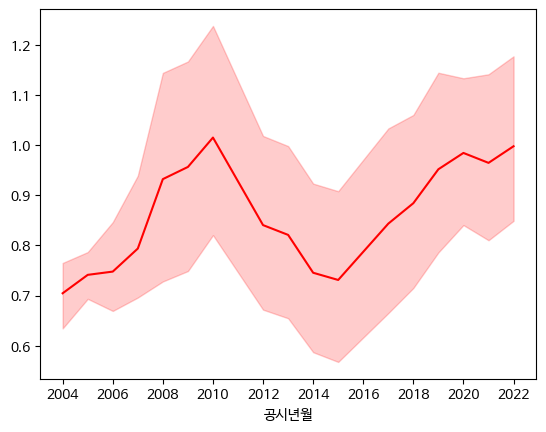

In [55]:
date='2022-01-01'
key='대구광역시 북구 태전동'
sns.lineplot(x=dff[key]['공시년월'], y=dff[key]['공시지가']/baseDateAlt(dff[key], date)/dff[key]['지수'] * 100, color='#FF0000')
plt.show()

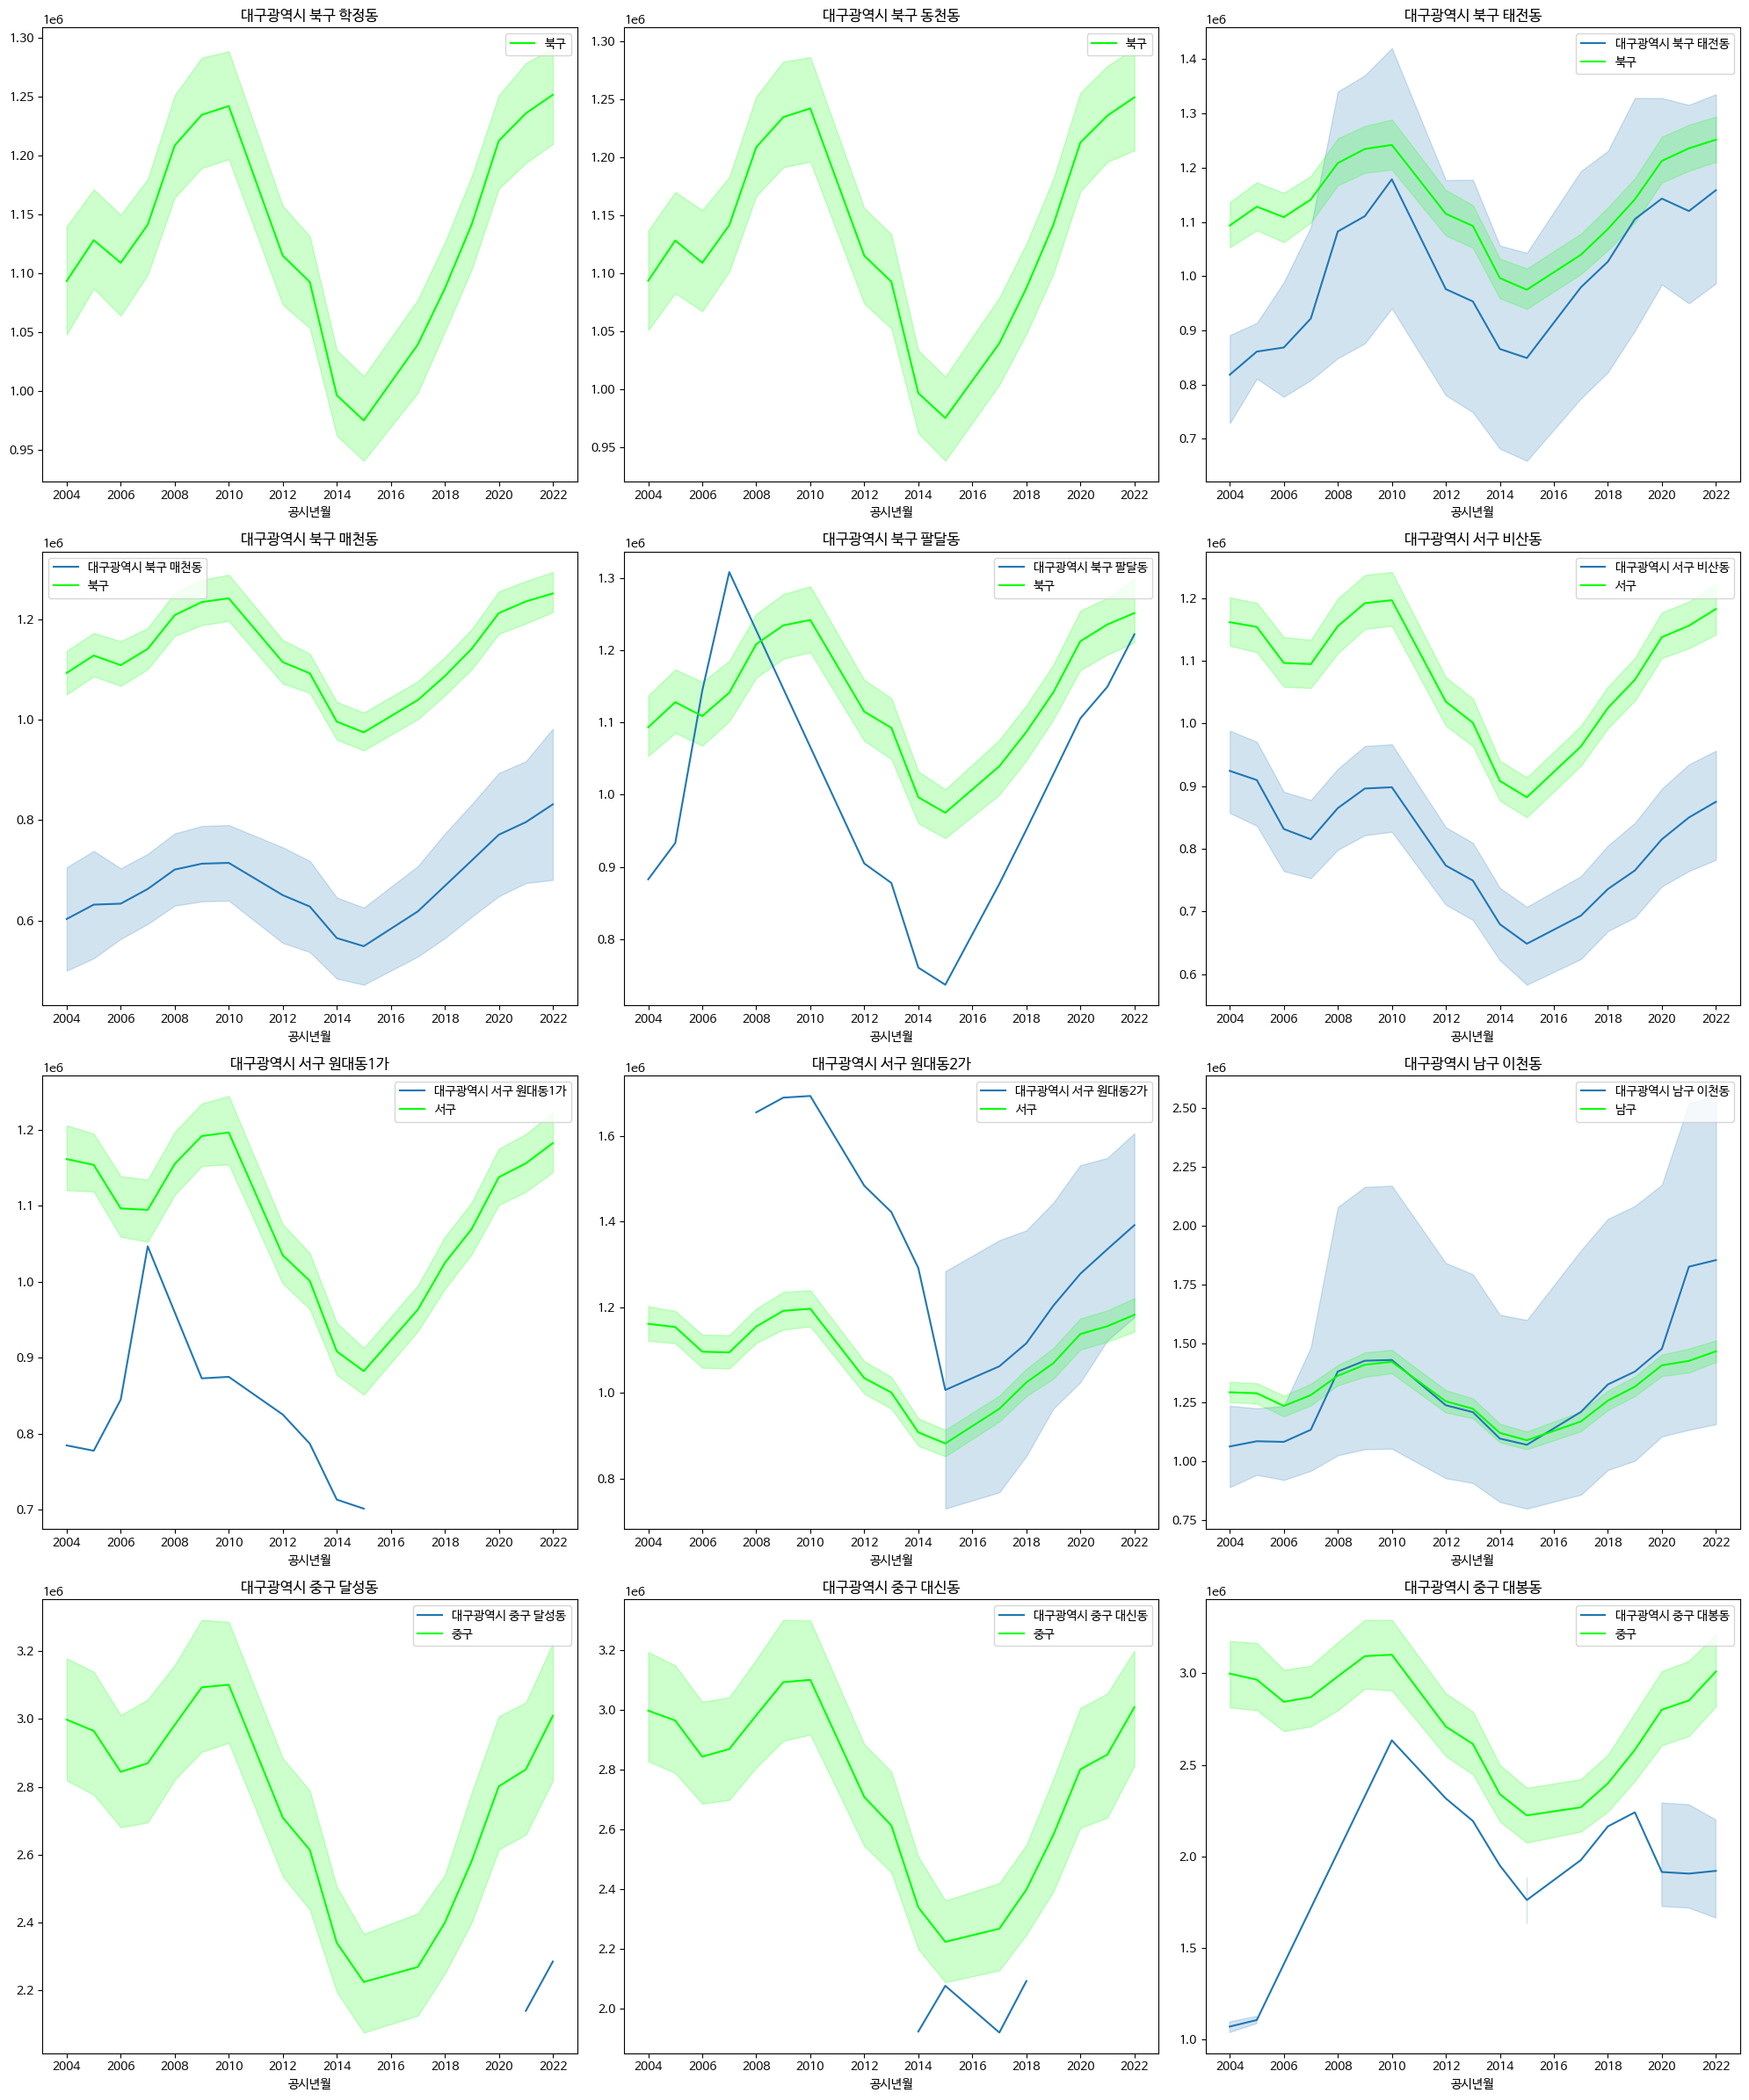

In [57]:
date='2022-01-01'
keys = [
    '대구광역시 북구 학정동',
    '대구광역시 북구 동천동',
    '대구광역시 북구 태전동',
    '대구광역시 북구 매천동',
    '대구광역시 북구 팔달동',
    '대구광역시 서구 비산동',
    '대구광역시 서구 원대동1가',
    '대구광역시 서구 원대동2가',
    '대구광역시 남구 이천동',
    '대구광역시 중구 달성동',
    '대구광역시 중구 대신동',
    '대구광역시 중구 대봉동'
]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 24))

for key, ax in zip(keys, axes.flatten()):
  #행정동평균
  y_values = dff[key]['공시지가']/dff[key]['지수'] * 100
  sns.lineplot(x=dff[key]['공시년월'], y=y_values, ax=ax, label=key)
  #대구평균
  key2 = key.split(' ')
  groups = df.groupby(df['시군구명'])
  dftmp=groups.get_group(key2[1])
  sns.lineplot(x=dftmp['공시년월'], y=dftmp['공시지가']/dftmp['지수'] * 100, ax=ax, label=key2[1], color='#00FF00')
  ax.set_title(key)

plt.tight_layout()
plt.show()

In [19]:
df['시군구'].unique()

array(['대구광역시 중구 동인동1가', '대구광역시 중구 동인동2가', '대구광역시 중구 동인동3가', '대구광역시 중구 동인동4가', '대구광역시 중구 삼덕동1가', '대구광역시 중구 삼덕동2가', '대구광역시 중구 삼덕동3가', '대구광역시 중구 봉산동', '대구광역시 중구 장관동', '대구광역시 중구 상서동', '대구광역시 중구 수동', '대구광역시 중구 덕산동', '대구광역시 중구 종로1가', '대구광역시 중구 종로2가', '대구광역시 중구 사일동', '대구광역시 중구 동일동', '대구광역시 중구 남일동', '대구광역시 중구 전동', '대구광역시 중구 동성로3가', '대구광역시 중구 동문동', '대구광역시 중구 문화동', '대구광역시 중구 공평동', '대구광역시 중구 동성로2가', '대구광역시 중구 태평로1가', '대구광역시 중구 교동', '대구광역시 중구 용덕동', '대구광역시 중구 상덕동', '대구광역시 중구 완전동', '대구광역시 중구 도원동', '대구광역시 중구 수창동', '대구광역시 중구 태평로3가', '대구광역시 중구 인교동', '대구광역시 중구 서야동', '대구광역시 중구 서성로1가', '대구광역시 중구 시장북로', '대구광역시 중구 하서동', '대구광역시 중구 남성로', '대구광역시 중구 계산동1가', '대구광역시 중구 계산동2가', '대구광역시 중구 동산동', '대구광역시 중구 서문로2가', '대구광역시 중구 서성로2가', '대구광역시 중구 포정동', '대구광역시 중구 서문로1가', '대구광역시 중구 서내동', '대구광역시 중구 북성로2가', '대구광역시 중구 대안동', '대구광역시 중구 동성로1가', '대구광역시 중구 태평로2가', '대구광역시 중구 북성로1가', '대구광역시 중구 화전동', '대구광역시 중구 향촌동', '대구광역시 중구 북내동', '대구광역시 중구 대신동', '대구광역시 중구 달성동', '대구광역시 중구 남산동', '대구광역시 중구 대봉동', '대구광역시 동구 신암동', '대구광역시 동구 신천동', '대구광역시 

In [88]:
dffmean = dff['대구광역시 서구 원대동1가'].groupby('공시년월').mean(numeric_only=True)
dffmeanseries = dffmean['공시지가']
dffmeanseries

공시년월
2004-01-01    400000.0
2005-01-01    400000.0
2006-01-01    480000.0
2007-01-01    600000.0
2009-01-01    465000.0
2010-01-01    465000.0
2012-01-01    520000.0
2013-01-01    520000.0
2014-01-01    530000.0
2015-01-01    557000.0
Name: 공시지가, dtype: float64

In [120]:
dfmean = df.groupby('공시년월').mean(numeric_only=True)
dfseries = dfmean['공시지가']
dfseries

공시년월
2004-01-01    5.701691e+05
2005-01-01    5.848782e+05
2006-01-01    6.338799e+05
2007-01-01    6.555470e+05
2008-01-01    6.776606e+05
2009-01-01    6.715610e+05
2010-01-01    6.776899e+05
2011-01-01             NaN
2012-01-01    7.094157e+05
2013-01-01    7.269390e+05
2014-01-01    7.443341e+05
2015-01-01    7.755549e+05
2016-01-01    8.339358e+05
2017-01-01    8.918455e+05
2018-01-01    9.667157e+05
2019-01-01    1.061594e+06
2020-01-01    1.136683e+06
2021-01-01    1.246418e+06
2022-01-01    1.364956e+06
Name: 공시지가, dtype: float64

In [70]:
dfcorr = pd.merge(dffmeanseries, dfseries, left_on='공시년월', right_on='공시년월')
dfcorr

,공시지가_x,공시지가_y
공시년월,,
2004-01-01,400000.0,570169.090526
2005-01-01,400000.0,584878.237193
2006-01-01,480000.0,633879.943083
2007-01-01,600000.0,655546.966397
2009-01-01,465000.0,671561.043516
2010-01-01,465000.0,677689.936513
2012-01-01,520000.0,709415.657686
2013-01-01,520000.0,726939.032903
2014-01-01,530000.0,744334.094512


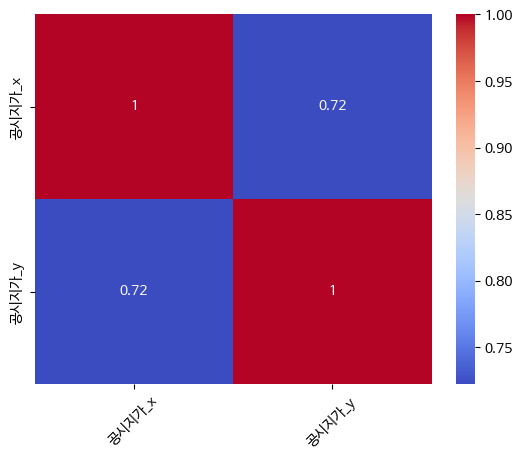

In [71]:
# Calculate the correlation matrix
correlation_by_date = dfcorr.corr()

# Create a heatmap of the correlation by date
sns.heatmap(correlation_by_date, annot=True, cmap='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

,Unnamed: 0,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,...,연도,？일련번호,일단지,공시지가(단위:원),도로접면,형상,고저,Unnamed: 17,시군구.1,읍면,동리,지번구분.1,본번지.1,부번지.1,지리적위치,용도지역,지세,공시년월,날짜,지수
0,51808,NaN,대구광역시 중구 동인동1가,10100.0,1.0,9,7,대구광역시,중구,동인동1가 9-7,대지,168.3,중심상업지역,NaN,업무용,후면상가지대,평지,세장형,세로(가),680000.0,...,2004,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,2004-01-01,50.981330
1,51809,NaN,대구광역시 중구 동인동1가,10100.0,1.0,10,6,대구광역시,중구,동인동1가 10-6,대지,85.6,중심상업지역,NaN,단독주택,일반주택지대,평지,세장형,세각(불),530000.0,...,2004,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,2004-01-01,50.981330
2,51810,NaN,대구광역시 중구 동인동1가,10100.0,1.0,14,1,대구광역시,중구,동인동1가 14-1,대지,161.0,중심상업지역,NaN,상업용,노선상가지대,평지,가장형,광대세각,2050000.0,...,2004,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,2004-01-01,50.981330
3,51811,NaN,대구광역시 중구 동인동1가,10100.0,1.0,49,1,대구광역시,중구,동인동1가 49-1,대지,16.8,중심상업지역,NaN,상업용,노선상가지대,평지,부정형,광대세각,2100000.0,...,2004,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,2004-01-01,50.981330
4,51812,NaN,대구광역시 중구 동인동1가,10100.0,1.0,86,0,대구광역시,중구,동인동1가 86,대지,295.4,중심상업지역,NaN,상업용,노선상가지대,평지,부정형,광대세각,1700000.0,...,2004,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,2004-01-01,50.981330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243999,50808,1406.0,대구광역시 중구 대봉동,15700.0,1.0,0742,12,대구광역시,중구,대봉동 742-12,대,119.0,중심상업지역,NaN,주상용,주택 및 상가혼용지대,평지,정방형,세각(가),1455000.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995
244000,50809,1407.0,대구광역시 중구 대봉동,15700.0,1.0,0742,22,대구광역시,중구,대봉동 742-22,대,105.1,제3종일반주거지역,NaN,단독주택,일반 주택지대,평지,정방형,세각(가),1250000.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995
244001,50810,1408.0,대구광역시 중구 대봉동,15700.0,1.0,0743,29,대구광역시,중구,대봉동 743-29,대,133.0,제3종일반주거지역,NaN,상업용,일반 상가지대,평지,사다리형,소로한면,2200000.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995
244002,50811,1409.0,대구광역시 중구 대봉동,15700.0,1.0,0745,1,대구광역시,중구,대봉동 745-1,대,156.4,제3종일반주거지역,NaN,단독주택,기존 주택지대,평지,세로장방형,세로(가),1355000.0,...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-01,2022-01-01,100.228995


In [187]:
#학정동, 동천동 제외
keys = [
    '대구광역시 북구 검단동',
    '대구광역시 북구 복현동',
    '대구광역시 북구 산격동',
    '대구광역시 북구 대현동',
    '대구광역시 동구 신암동',
    '대구광역시 동구 봉무동',
    '대구광역시 동구 신천동',
]
#행정동별
dffmeanseries={}
dffseries=pd.DataFrame()
for key in keys:
  dffmean = dff[key].groupby('공시년월').mean(numeric_only=True)
  dffmeanseries[key] = dffmean['공시지가']
  dffmeanseries[key] = dffmeanseries[key].rename(key)

#대구광역시평균
dfmean = df.groupby('공시년월').mean(numeric_only=True)
dfm = dfmean['공시지가']
dfm = dfm.rename('대구광역시')

#행정구별
df1 = df[df['시군구명']=='북구'].groupby('공시년월').mean(numeric_only=True)
df1 = df1['공시지가']
df1 = df1.rename('북구')
df2 = df[df['시군구명']=='동구'].groupby('공시년월').mean(numeric_only=True)
df2 = df2['공시지가']
df2 = df2.rename('동구')
df3 = df[df['시군구명']=='남구'].groupby('공시년월').mean(numeric_only=True)
df3 = df3['공시지가']
df3 = df3.rename('남구')
df4 = df[df['시군구명']=='중구'].groupby('공시년월').mean(numeric_only=True)
df4= df4['공시지가']
df4 = df4.rename('중구')

list_tmp_df = []
list_tmp_df.append(dfm)
list_tmp_df.append(df1)
list_tmp_df.append(df2)
#list_tmp_df.append(df3)
#list_tmp_df.append(df4)
for key in keys:
  list_tmp_df.append(dffmeanseries[key])
dffseries = pd.concat(list_tmp_df, axis=1)

dffseries

,대구광역시,북구,동구,대구광역시 북구 검단동,대구광역시 북구 복현동,대구광역시 북구 산격동,대구광역시 북구 대현동,대구광역시 동구 신암동,대구광역시 동구 봉무동,대구광역시 동구 신천동
공시년월,,,,,,,,,,
2004-01-01,5.701691e+05,5.574385e+05,3.753742e+05,330000.0,5.488889e+05,5.000000e+05,570000.0,5.143750e+05,NaN,507500.0
2005-01-01,5.848782e+05,5.803546e+05,3.916442e+05,345000.0,5.777778e+05,5.033333e+05,570000.0,5.375000e+05,NaN,496000.0
2006-01-01,6.338799e+05,6.299242e+05,4.257068e+05,345000.0,6.666667e+05,5.600000e+05,650000.0,6.043750e+05,NaN,576000.0
2007-01-01,6.555470e+05,6.541868e+05,4.553876e+05,350000.0,7.233333e+05,6.400000e+05,780000.0,6.831250e+05,4.100000e+05,684000.0
2008-01-01,6.776606e+05,6.717828e+05,4.821537e+05,350000.0,7.525000e+05,6.933333e+05,900000.0,7.312500e+05,4.400000e+05,745000.0
2009-01-01,6.715610e+05,6.576895e+05,4.798805e+05,340000.0,7.628571e+05,6.833333e+05,890000.0,7.243750e+05,4.300000e+05,814000.0
2010-01-01,6.776899e+05,6.601569e+05,4.938638e+05,340000.0,7.671429e+05,6.866667e+05,900000.0,7.366667e+05,4.300000e+05,826000.0
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01,7.094157e+05,7.025698e+05,5.265530e+05,355000.0,7.712500e+05,7.300000e+05,920000.0,7.653333e+05,7.100000e+05,860000.0


In [188]:
# 결측치 채우기
dffseries=dffseries.fillna(method='ffill')
dffseries=dffseries.fillna(method='bfill')
dffseries=dffseries.fillna(0)
dffseries=dffseries.pct_change()
dffseries

,대구광역시,북구,동구,대구광역시 북구 검단동,대구광역시 북구 복현동,대구광역시 북구 산격동,대구광역시 북구 대현동,대구광역시 동구 신암동,대구광역시 동구 봉무동,대구광역시 동구 신천동
공시년월,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01,0.025798,0.041110,0.043343,0.045455,0.052632,0.006667,0.000000,0.044957,0.000000,-0.022660
2006-01-01,0.083781,0.085412,0.086973,0.000000,0.153846,0.112583,0.140351,0.124419,0.000000,0.161290
2007-01-01,0.034182,0.038517,0.069721,0.014493,0.085000,0.142857,0.200000,0.130300,0.000000,0.187500
2008-01-01,0.033733,0.026897,0.058777,0.000000,0.040323,0.083333,0.153846,0.070448,0.073171,0.089181
2009-01-01,-0.009001,-0.020979,-0.004715,-0.028571,0.013764,-0.014423,-0.011111,-0.009402,-0.022727,0.092617
2010-01-01,0.009126,0.003752,0.029139,0.000000,0.005618,0.004878,0.011236,0.016969,0.000000,0.014742
2011-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-01,0.046815,0.064247,0.066191,0.044118,0.005354,0.063107,0.022222,0.038914,0.651163,0.041162


In [189]:
plt.rcParams['figure.figsize'] = [10, 8] # setting figure size

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


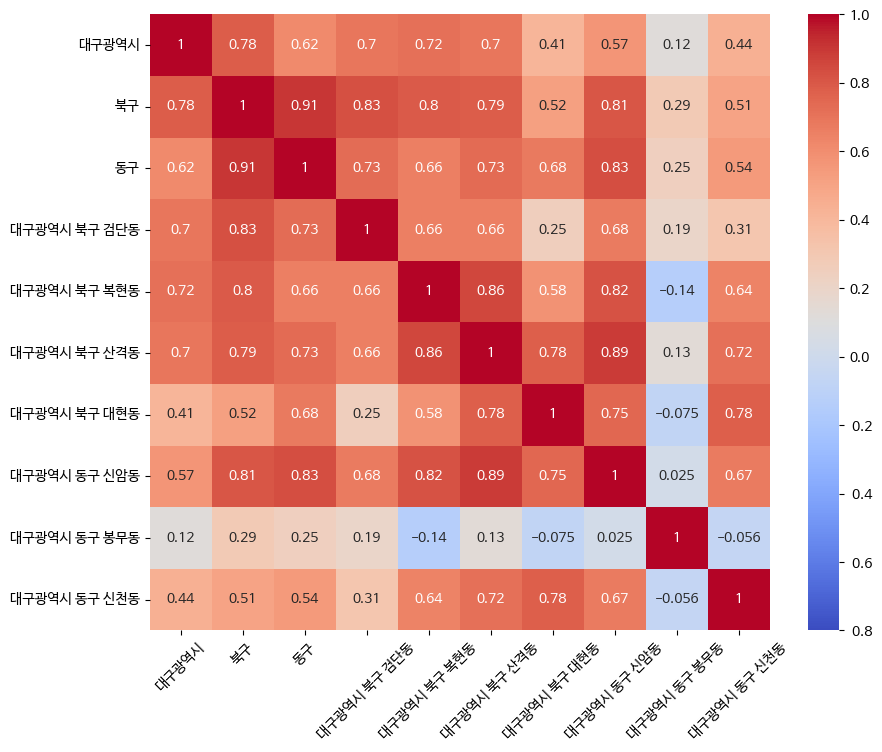

In [190]:
#2004~2022
# Calculate the correlation matrix
correlation_by_date = dffseries.corr()

# Create a heatmap of the correlation by date
sns.heatmap(correlation_by_date, annot=True, cmap='coolwarm', vmin=-0.8, vmax=1.0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

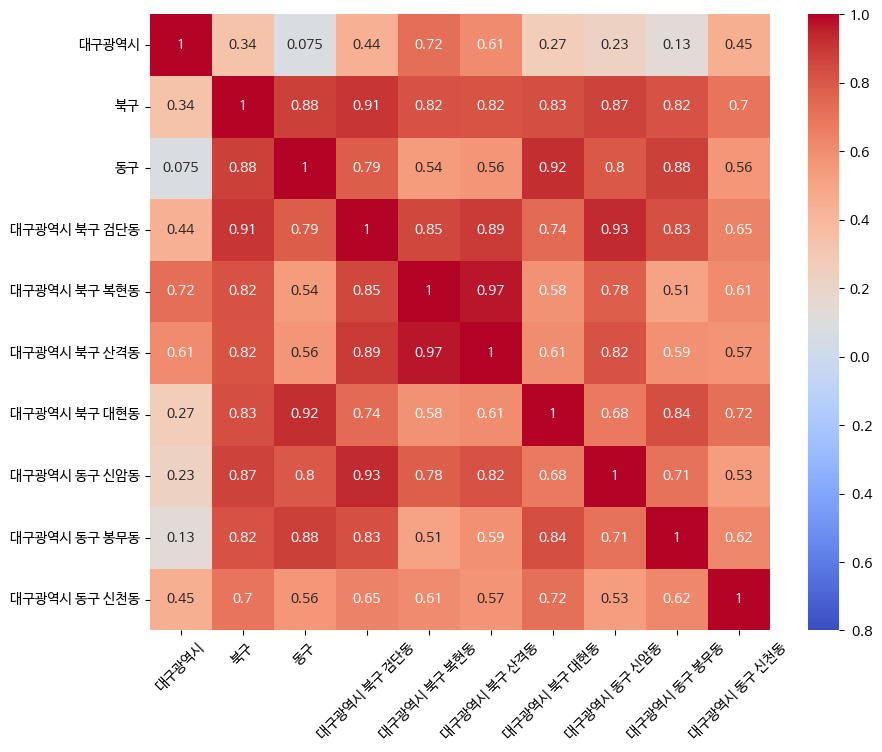

In [191]:
#2015~2022
dffseries=dffseries[11:]

# Calculate the correlation matrix
correlation_by_date = dffseries.corr()

# Create a heatmap of the correlation by date
sns.heatmap(correlation_by_date, annot=True, cmap='coolwarm', vmin=-0.8, vmax=1.0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [163]:
dfm

공시년월
2004-01-01    5.701691e+05
2005-01-01    5.848782e+05
2006-01-01    6.338799e+05
2007-01-01    6.555470e+05
2008-01-01    6.776606e+05
2009-01-01    6.715610e+05
2010-01-01    6.776899e+05
2011-01-01             NaN
2012-01-01    7.094157e+05
2013-01-01    7.269390e+05
2014-01-01    7.443341e+05
2015-01-01    7.755549e+05
2016-01-01    8.339358e+05
2017-01-01    8.918455e+05
2018-01-01    9.667157e+05
2019-01-01    1.061594e+06
2020-01-01    1.136683e+06
2021-01-01    1.246418e+06
2022-01-01    1.364956e+06
Name: 대구광역시, dtype: float64

In [192]:
dfm=dfm.pct_change()
dfm

공시년월
2004-01-01         NaN
2005-01-01    0.025798
2006-01-01    0.083781
2007-01-01    0.034182
2008-01-01    0.033733
2009-01-01   -0.009001
2010-01-01    0.009126
2011-01-01    0.000000
2012-01-01    0.046815
2013-01-01    0.024701
2014-01-01    0.023929
2015-01-01    0.041945
2016-01-01    0.075276
2017-01-01    0.069441
2018-01-01    0.083950
2019-01-01    0.098145
2020-01-01    0.070733
2021-01-01    0.096539
2022-01-01    0.095103
Name: 대구광역시, dtype: float64